In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [67]:
df = pd.read_csv('shoesprices_usd.csv', low_memory=False)
df.shape

(18280, 48)

In [32]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [68]:
#Our target variable : prices_amountmin
#Mean value:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

93.53952188183217

In [69]:
#Basic Model - Dummy
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

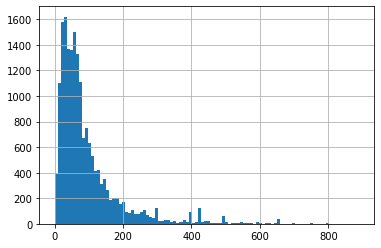

In [45]:
 df['prices_amountmin'].hist(bins=100);

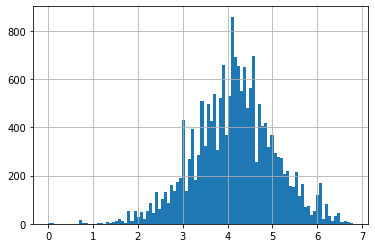

In [70]:
np.log(  df['prices_amountmin'] + 1 ).hist(bins=100);

In [71]:
median_price = np.median( df['prices_amountmin'] )

y_true = df['prices_amountmin']
y_pred = [median_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
#Median value better handles outliers: 58 vs 63 (mean)

In [72]:
#Median normalization
median_price = np.median( df['prices_amountmin'] )

y_true = df['prices_amountmin']
price_log = np.expm1( np.median( np.log1p(y_true) ) ) -1
y_pred = [price_log] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.0182341356674

In [0]:
#We'd like to check how does the brand affect the price?
# We have 1856 unique brands in the dataset
df.brand.value_counts()

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [75]:
X = df[ ['brand_cat'] ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error' )

np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
feats = df.select_dtypes(include=[np.number]).columns

def run_model(feats):
  X = df[ feats ].values
  y = df[ 'prices_amountmin' ].values

  model = DecisionTreeRegressor(max_depth = 5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error' )

  return np.mean(scores), np.std(scores)

In [77]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)